<a href="https://colab.research.google.com/github/hrbae/DRB_ML_Training/blob/main/2022/week10/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 데이터
# 2. 하드웨어, GPU
# 3. 딥러닝 라이브러리, API (tensorflow(google), pytorch(meta))

## 라이브러리 불러오기

In [38]:
# tensorflow와 keras를 불러들임.
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 그외 헬퍼 라이브러리
import numpy as np
import matplotlib.pyplot as plt

## Fashion MNIST 데이터셋 불러오기

In [39]:
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y),(test_X,test_y) = fashion_mnist.load_data()

## 데이터 차원 확인

In [40]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [41]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## 데이터 정체 확인

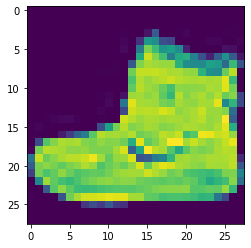

In [42]:
plt.imshow(train_X[0])

In [43]:
test_y[0]

9

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

In [45]:
# 이미지 데이터를 0~1사이의 값을 갖도록 표준화
train_X = train_X/255.0
test_X = test_X/255.0

## 딥러닝 모델 만들기

In [50]:
# 모델의 구성
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [52]:
# 모델 컴파일 (손실함수의 형태, 최적화 알고리즘, 성능지표)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
# 모델의 summary 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(train_X, train_y, 
          validation_data=(test_X,test_y),
          batch_size=64, 
          epochs=1000)

Epoch 1/1000
938/938 [==============================] - 4s 4ms/step - loss: 0.5208 - accuracy: 0.8189 - val_loss: 0.4465 - val_accuracy: 0.8443
Epoch 2/1000
938/938 [==============================] - 3s 3ms/step - loss: 0.3863 - accuracy: 0.8641 - val_loss: 0.4278 - val_accuracy: 0.8433
Epoch 3/1000
938/938 [==============================] - 3s 4ms/step - loss: 0.3442 - accuracy: 0.8765 - val_loss: 0.3794 - val_accuracy: 0.8644
Epoch 4/1000
938/938 [==============================] - 4s 4ms/step - loss: 0.3222 - accuracy: 0.8835 - val_loss: 0.3549 - val_accuracy: 0.8759
Epoch 5/1000
938/938 [==============================] - 3s 4ms/step - loss: 0.3029 - accuracy: 0.8884 - val_loss: 0.3738 - val_accuracy: 0.8638
Epoch 6/1000
938/938 [==============================] - 3s 4ms/step - loss: 0.2904 - accuracy: 0.8931 - val_loss: 0.3407 - val_accuracy: 0.8787
Epoch 7/1000
938/938 [==============================] - 3s 3ms/step - loss: 0.2758 - accuracy: 0.8982 - val_loss: 0.3447 - val_accuracy:

KeyboardInterrupt: ignored